## Product Demand Prediction

# Problem Statement  :- A product company plans to offer discounts on its product during the upcoming holiday season. The company wants to find the price at which its product can be a better deal compared to its competitors. For this task, the company provided a dataset of past changes in sales based on price changes. You need to train a model that can predict the demand for the product in the market with different price segments.

In [1]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

In [2]:
 df = pd.read_csv(r"C:\Users\vedpa\Downloads\archive (11)\PoductDemand.csv")

In [3]:
df

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52
...,...,...,...,...,...
150145,212638,9984,235.8375,235.8375,38
150146,212639,9984,235.8375,235.8375,30
150147,212642,9984,357.6750,483.7875,31
150148,212643,9984,141.7875,191.6625,12


In [9]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))


The train data has 150150 rows and 5 columns


In [10]:
df['Units Sold'].value_counts()

Units Sold
15      3128
18      3024
17      2939
23      2854
21      2843
        ... 
1099       1
433        1
801        1
694        1
664        1
Name: count, Length: 708, dtype: int64

In [4]:
df.shape

(150150, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150150 non-null  int64  
 1   Store ID     150150 non-null  int64  
 2   Total Price  150149 non-null  float64
 3   Base Price   150150 non-null  float64
 4   Units Sold   150150 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 5.7 MB


In [12]:
df.iloc[1]

ID                2.0000
Store ID       8091.0000
Total Price      99.0375
Base Price       99.0375
Units Sold       28.0000
Name: 1, dtype: float64

In [15]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  3
There names are as follows:  ['ID', 'Store ID', 'Units Sold']


In [16]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  2
There name are as follow:  ['Total Price', 'Base Price']


In [17]:
len(df['ID'].unique()), df.shape[0]

(150150, 150150)

In [18]:
df = df.drop(['ID'],axis=1)
int64_lst.remove('ID')

In [19]:
df.describe()

,Store ID,Total Price,Base Price,Units Sold
count,150150.000000,150149.000000,150150.000000,150150.000000
mean,9199.422511,206.626751,219.425927,51.674206
std,615.591445,103.308516,110.961712,60.207904
min,8023.000000,41.325000,61.275000,1.000000
25%,8562.000000,130.387500,133.237500,20.000000
50%,9371.000000,198.075000,205.912500,35.000000
75%,9731.000000,233.700000,234.412500,62.000000
max,9984.000000,562.162500,562.162500,2876.000000


In [20]:
df.mean()

Store ID       9199.422511
Total Price     206.626751
Base Price      219.425927
Units Sold       51.674206
dtype: float64

In [21]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df
mean_cal(df, int64_lst)

,normal_value,zero_value
0,2,0


In [22]:
mean_cal(df,float64_lst)

,normal_value,zero_value
0,2,0


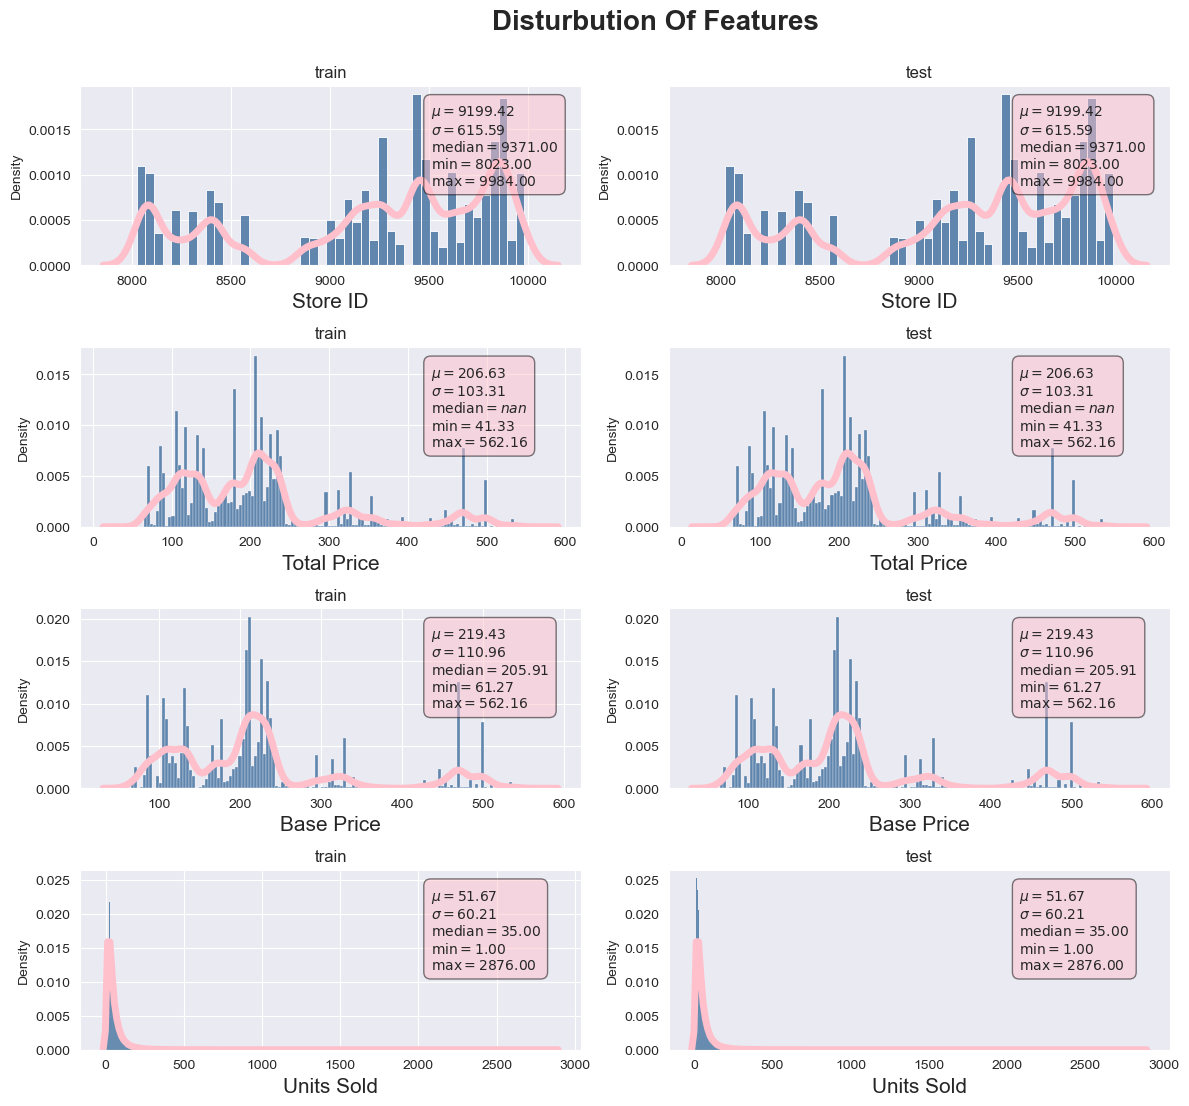

In [23]:
sns.set_style('darkgrid')
color = 'royalblue'

plt.figure(figsize = (12,55))
i = 0
for index, col in enumerate(list(df.columns.values)):
    i += 1 ;
    plt.subplot(21,2, index + i)
    ax = sns.histplot(x = col, data = df, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = df, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('train')
    # set text on axes
    textstr_train = '\n'.join((
    r'$\mu=%.2f$' %df[col].mean(),
    r'$\sigma=%.2f$' %df[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(df[col]),
    r'$\mathrm{min}=%.2f$' %df[col].min(),
    r'$\mathrm{max}=%.2f$' %df[col].max()
    ))
    ax.text(0.7, 0.90, textstr_train, transform=ax.transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
    
    plt.subplot(21,2, index + (i+1))
    ax = sns.histplot(x = col, data = df, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = df, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('test')
    
    textstr_test = '\n'.join((
    r'$\mu=%.2f$' %df[col].mean(),
    r'$\sigma=%.2f$' %df[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(df[col]),
    r'$\mathrm{min}=%.2f$' %df[col].min(),
    r'$\mathrm{max}=%.2f$' %df[col].max()
    ))
    ax.text(0.7, 0.90, textstr_test, transform=ax.transAxes, fontsize=10, verticalalignment='top',bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
    plt.grid()

plt.suptitle("Disturbution Of Features", y = 1, x = 0.55, size = 20,fontweight = "bold")
plt.tight_layout()
plt.show()

In [24]:
df.isnull().sum()

Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64

In [25]:
df.isna().sum()

Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64

In [26]:
df.dropna(inplace=True)

In [27]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)
for value in objects_lst:
    
    print(f"{value:{10}} {df[value].value_counts()}")

In [28]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df
float64_cols = ['float64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,Total Price,1.2506,positive (+ve) skewed
1,Base Price,1.2090,positive (+ve) skewed


In [29]:
skew_total_df

,positive (+ve) skewed,normal distrbution,negative (-ve) skewed
0,2,0,0


In [30]:
int64_cols = ['int64']
int64_lst_col = list(df.select_dtypes(include=int64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, int64_lst_col)
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,Store ID,-0.6362,negative (-ve) skewed
1,Units Sold,6.1150,positive (+ve) skewed


In [31]:
skew_total_df

,positive (+ve) skewed,normal distrbution,negative (-ve) skewed
0,1,0,1


In [33]:
df['Total Price']=np.power(df['Total Price'],1/3)
df['Base Price']=np.power(df['Base Price'],1/3)
df['Store ID']=np.power(df['Store ID'],3)
df.skew()

Store ID      -0.497327
Total Price    0.502726
Base Price     0.504992
Units Sold     6.115006
dtype: float64

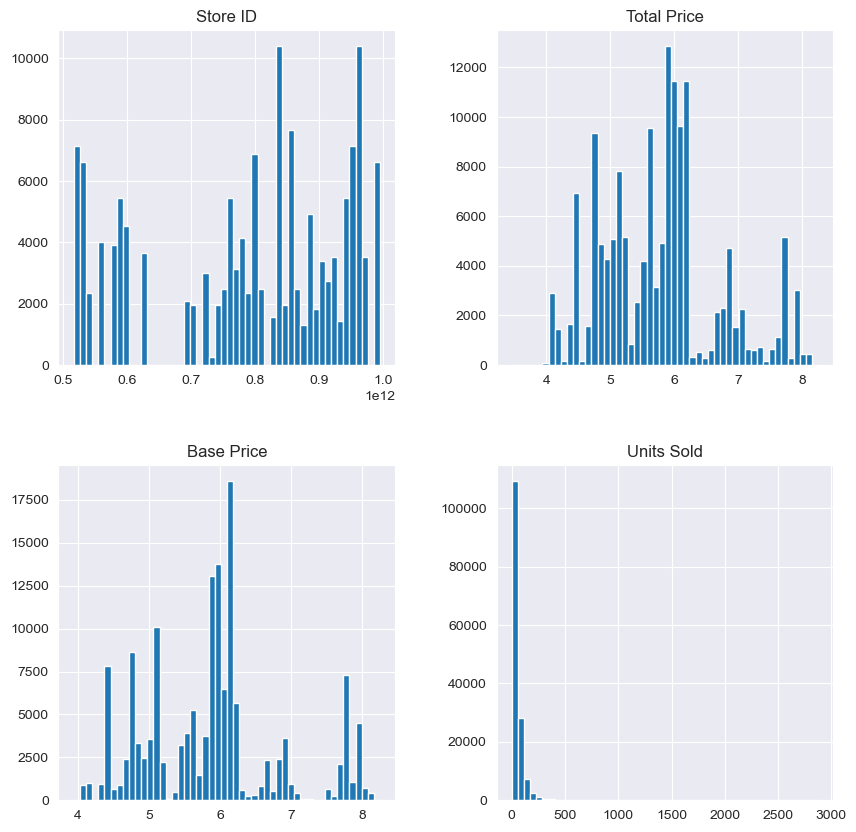

In [34]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(10,10))
plt.show()

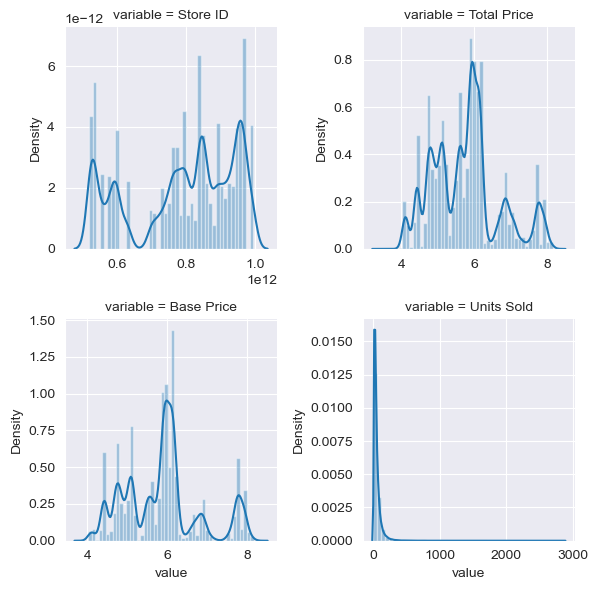

In [35]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=2, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [36]:
df['Units Sold'].skew()

6.1150058906787095

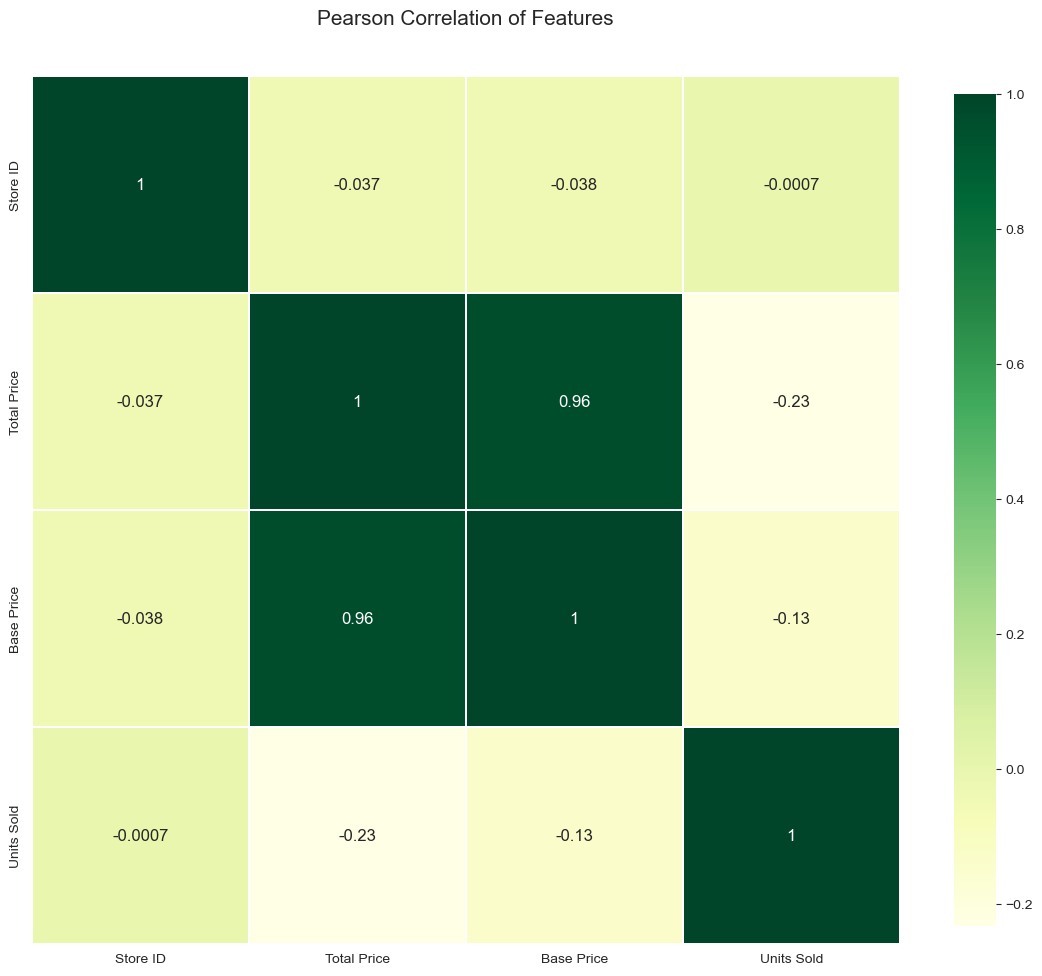

In [37]:
#correlation plot
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

In [38]:
df.corr()

,Store ID,Total Price,Base Price,Units Sold
Store ID,1.000000,-0.037371,-0.037956,-0.000704
Total Price,-0.037371,1.000000,0.964082,-0.233315
Base Price,-0.037956,0.964082,1.000000,-0.132529
Units Sold,-0.000704,-0.233315,-0.132529,1.000000


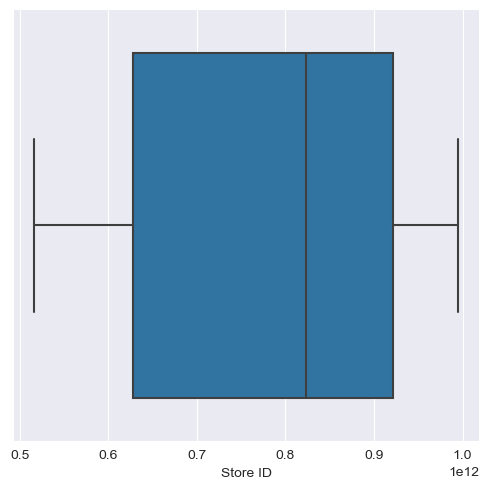

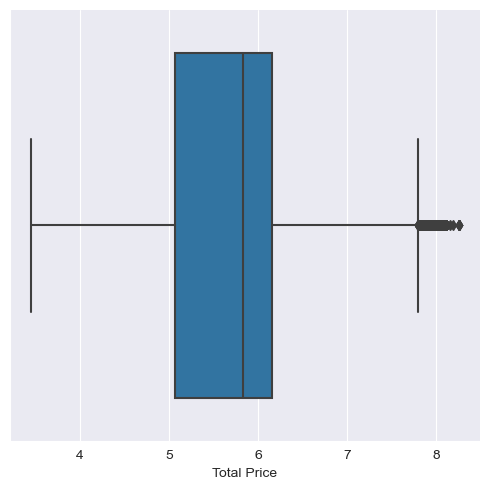

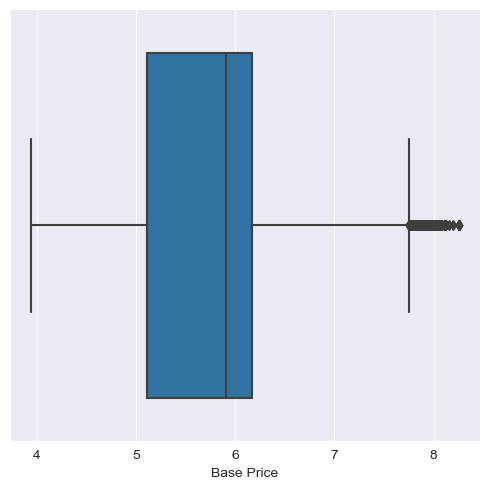

In [39]:
features = ['Store ID', 'Total Price', 'Base Price']
for value in features:
    sns.catplot(data=df, x=value,  kind="box")

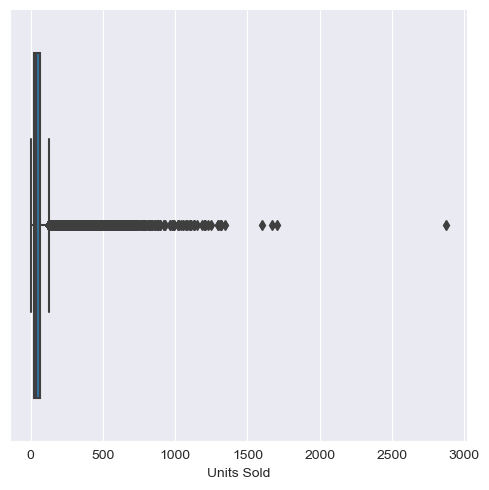

In [40]:
#for target variable
sns.catplot(data=df, x='Units Sold', kind='box')

In [41]:
# Separate target and feature column in X and y variable

target = 'Units Sold'

# X will be the features
X = df.drop(target,axis=1) 
#y will be the target variable
y = df[target]

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150149 entries, 0 to 150149
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Store ID     150149 non-null  int64  
 1   Total Price  150149 non-null  float64
 2   Base Price   150149 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 4.6 MB


In [43]:
y

0         20
1         28
2         19
3         44
4         52
          ..
150145    38
150146    30
150147    31
150148    12
150149    15
Name: Units Sold, Length: 150149, dtype: int64

In [44]:
X.shape, y.shape

((150149, 3), (150149,))

In [45]:
y = y.values.reshape(-1,1)

In [46]:
X.shape, y.shape

((150149, 3), (150149, 1))

In [47]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120119, 3), (30030, 3), (120119, 1), (30030, 1))

In [48]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression

li_R = LinearRegression() #Object Creation

li_R.fit(X_train, y_train)
LinearRegression()

LinearRegression()

In [51]:
LinearRegression()
#Accuracy check of trainig data

#Get R2 score
li_R.score(X_train, y_train)

0.17524520139126532

In [52]:
#Accuracy of test data
li_R.score(X_test, y_test)

0.17637133833689211

In [53]:
# Getting kfold values
li_scores = -1 * cross_val_score(li_R, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
li_scores

array([52.18596846, 53.76782224, 54.81863881, 58.70806771, 55.50858594,
       59.95588495, 56.82895303, 55.97829871, 54.05493398, 50.99788743])

In [54]:
# Mean of the train kfold scores
li_score_train = np.mean(li_scores)
li_score_train

55.28050412550647

In [55]:
# Predict the values on X_test_scaled dataset 
y_predicted = li_R.predict(X_test)

In [56]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import r2_score  

li_acc = r2_score(y_test, y_predicted)*100
print("The model used is Linear Regression")
print("R2 Score is: -")
print()
print(li_acc)

The model used is Linear Regression
R2 Score is: -

17.637133833689212


In [57]:
#Using Lasso Regression
from sklearn import linear_model
la_R = linear_model.Lasso(alpha=0.1)
#looking for training data
la_R.fit(X_train,y_train)
Lasso(alpha=0.1)

Lasso(alpha=0.1)

In [58]:
Lasso(alpha=0.1)
#Accuracy check of trainig data
la_R.score(X_train, y_train)

0.17507321798059527

In [59]:
# Predict the values on X_test_scaled dataset 
y_predicted=la_R.predict(X_test)

In [60]:
#Accuracy check of test data
la_acc = r2_score(y_test,y_predicted)*100
print("The model used is Lasso Regression")
print("R2 Score is: -")
print()
print(la_acc)

The model used is Lasso Regression
R2 Score is: -

17.701647186969627


In [61]:
#Using DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt_R = DecisionTreeRegressor()
#looking for training data
dt_R.fit(X_train,y_train)
DecisionTreeRegressor()

DecisionTreeRegressor()

In [62]:
DecisionTreeRegressor()
#Accuracy check of trainig data
dt_R.score(X_train, y_train)

0.8879404070750555

In [63]:
# Predict the values on X_test_scaled dataset 

y_predicted=dt_R.predict(X_test)

In [64]:
#Accuracy check of test data
dt_acc = r2_score(y_test,y_predicted)*100
print("The model used is DecisionTreeRegressor")
print("R2 Score is: -")
print()
print(dt_acc)

The model used is DecisionTreeRegressor
R2 Score is: -

46.384564208482836


In [65]:
cal_metric=pd.DataFrame([li_acc,la_acc,dt_acc],columns=["Score in percentage"])
cal_metric.index=['Linear Regression',
                  'Lasso Regression',
                  'Decision Tree Regressor']
cal_metric

,Score in percentage
Linear Regression,17.637134
Lasso Regression,17.701647
Decision Tree Regressor,46.384564


In [66]:
import pickle
pickle.dump(li_R , open('Product_Demand_li.pkl', 'wb'))
pickle.dump(la_R , open('Product_Demand_la.pkl', 'wb'))
pickle.dump(dt_R , open('Product_Demand_dt.pkl', 'wb'))
import pickle

def model_prediction(features):
    
    pickled_model = pickle.load(open('Product_Demand_dt.pkl', 'rb'))
    units = str(pickled_model.predict(features)[0])
    
    return str(f'The number of units solds is {units}')

In [68]:
model_prediction([[Store_ID, Total_Price, Base_Price]])

'The number of units solds is 20.0'

## Conclusion

After observing the problem statement we have build an efficient model to overcome it. 
The above model helps in predicting the demand for a product varies with the change in its price. 
Price is one of the major factors that affect the demand for the product. 
If a product is not a necessity, only a few people buy the product even if the price increases.
The accuracy for the prediction is 46.17%.